### Preprocessing

In [7]:
# import relevant statistical packages
import numpy as np
import pandas as pd

In [8]:
# import relevant data visualisation packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
# import custom packages
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score as r2, mean_squared_error
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from mlxtend.plotting import plot_linear_regression as PLS
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.externals.six import StringIO
import pydotplus
from IPython.display import Image
from sklearn.ensemble import RandomForestRegressor

In [10]:
# import data
url = "/Users/arpanganguli/Documents/Professional/Finance/ISLR/Boston.csv"
Boston = pd.read_csv(url, index_col='SlNo')
Boston = pd.get_dummies(Boston, columns=['chas'], drop_first=True)
Boston.head()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,chas_1
SlNo,,,,,,,,,,,,,,
1,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
2,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
3,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0
4,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0
5,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0


### Boosting ($\lambda$=0.001)

In [12]:
X = Boston.drop('medv', axis = 1)
y = Boston.medv

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.5, test_size = 0.5, random_state = 0)
bag_Boston = RandomForestRegressor(max_features=13).fit(X_train, y_train)

In [16]:
boost_Boston = GradientBoostingRegressor(n_estimators=5000, max_depth=4, learning_rate=0.001).fit(X_train, y_train)
print("Mean Squared Error: ", mean_squared_error(y_test, boost_Boston.predict(X_test)))

Mean Squared Error:  17.519386345852993


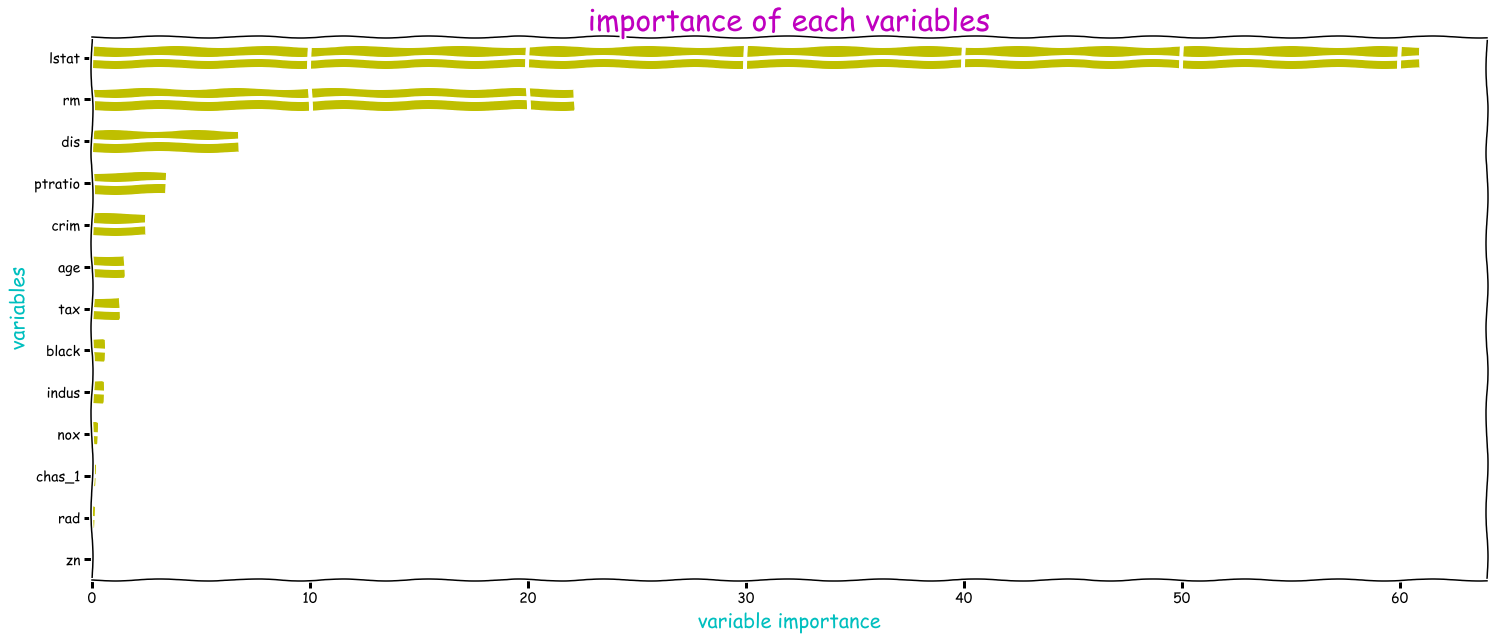

In [21]:
feature_importance = boost_Boston.feature_importances_*100
rel_imp = pd.Series(feature_importance, index = X.columns).sort_values(inplace = False)

rel_imp.T.plot(kind = 'barh', color = 'y', figsize=(25, 10), grid= True, )

plt.xkcd()
plt.xlabel('variable importance', fontsize=20, color='c')
plt.ylabel('variables', fontsize=20, color='c')
plt.title('importance of each variables', fontsize=30, color='m')
plt.gca().legend_ = None

**From the above diagramme, it is clear that $lstat$ and $rm$ are the most important variables. What is important to note is that the MSE of boosting is similar to that of bagging. Therefore, I will need to use a different value of the tuning parameter, $\lambda$.**

### Boosting ($\lambda$=0.2)

In [23]:
boost_Boston = GradientBoostingRegressor(n_estimators=5000, max_depth=4, learning_rate=0.2).fit(X_train, y_train)
print("Mean Squared Error: ", mean_squared_error(y_test, boost_Boston.predict(X_test)))

Mean Squared Error:  17.474894794340194


**Therefore using $\lambda$=0.2 leads to a slightly lower test MSE than $\lambda$=0.0001.**